In [1]:
%pip install llama_index ftfy regex tqdm
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-n6qz2f3s
  Running command git clone --filter=blob:none --q

In [2]:
from moviepy.editor import VideoFileClip
from pydub import AudioSegment
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [3]:
import os

OPENAI_API_TOKEN = ""
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [4]:
video_url = "https://www.youtube.com/watch?v=d_qvLDhkg00"
output_video_path = "./video_data/"
output_folder = "./mixed_data/"
output_audio_path = "./mixed_data/output_audio.wav"

filepath = output_video_path + "input_vid.mp4"
Path(output_folder).mkdir(parents=True, exist_ok=True)

In [5]:
from PIL import Image
import matplotlib.pyplot as plt
import os


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 7:
                break

In [6]:
def download_video(url, output_path):
    """
    Download a video from a given url and save it to the output path.

    Parameters:
    url (str): The url of the video to download.
    output_path (str): The path to save the video to.

    Returns:
    dict: A dictionary containing the metadata of the video.
    """
    yt = YouTube(url)
    metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
    yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
    return metadata


def video_to_images(video_path, output_folder):
    """
    Convert a video to a sequence of images and save them to the output folder.

    Parameters:
    video_path (str): The path to the video file.
    output_folder (str): The path to the folder to save the images to.

    """
    clip = VideoFileClip(video_path)
    clip.write_images_sequence(
        os.path.join(output_folder, "frame%04d.png"), fps=0.2
    )


def video_to_audio(video_path, output_audio_path):
    """
    Convert a video to audio and save it to the output path.

    Parameters:
    video_path (str): The path to the video file.
    output_audio_path (str): The path to save the audio to.

    """
    clip = VideoFileClip(video_path)
    audio = clip.audio
    audio.write_audiofile(output_audio_path)


def audio_to_text(audio_path):
    """
    Convert audio to text using the SpeechRecognition library.

    Parameters:
    audio_path (str): The path to the audio file.

    Returns:
    test (str): The text recognized from the audio.

    """
    recognizer = sr.Recognizer()
    audio = sr.AudioFile(audio_path)

    with audio as source:
        # Record the audio data
        audio_data = recognizer.record(source)

        try:
            # Recognize the speech
            text = recognizer.recognize_whisper(audio_data)
        except sr.UnknownValueError:
            print("Speech recognition could not understand the audio.")
        except sr.RequestError as e:
            print(f"Could not request results from service; {e}")

    return text

In [8]:
!pip install -q git+https://github.com/openai/whisper.git -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [9]:
try:
    metadata_vid = download_video(video_url, output_video_path)
    video_to_images(filepath, output_folder)
    video_to_audio(filepath, output_audio_path)
    text_data = audio_to_text(output_audio_path)

    with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
    print("Text data saved to file")
    file.close()
    os.remove(output_audio_path)
    print("Audio file removed")

except Exception as e:
    raise e

Moviepy - Writing frames ./mixed_data/frame%04d.png.


Moviepy - Done writing frames ./mixed_data/frame%04d.png.
MoviePy - Writing audio in ./mixed_data/output_audio.wav


MoviePy - Done.


100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 65.0MiB/s]


Text data saved to file
Audio file removed


In [10]:
from llama_index.indices.multi_modal.base import MultiModalVectorStoreIndex
from llama_index import SimpleDirectoryReader, StorageContext

from llama_index import SimpleDirectoryReader, StorageContext
from llama_index.vector_stores import LanceDBVectorStore

from llama_index import (
    SimpleDirectoryReader,
)

text_store = LanceDBVectorStore(uri="lancedb", table_name="text_collection")
image_store = LanceDBVectorStore(uri="lancedb", table_name="image_collection")
storage_context = StorageContext.from_defaults(
    vector_store=text_store, image_store=image_store
)

# Create the MultiModal index
documents = SimpleDirectoryReader(output_folder).load_data()

index = MultiModalVectorStoreIndex.from_documents(
    documents,
    storage_context=storage_context,
)

retriever_engine = index.as_retriever(
    similarity_top_k=5, image_similarity_top_k=5
)

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 76.7MiB/s]


In [11]:
import json

metadata_str = json.dumps(metadata_vid)

qa_tmpl_str = (
    "Given the provided information, including relevant images and retrieved context from the video, \
 accurately and precisely answer the query without any additional prior knowledge.\n"
    "Please ensure honesty and responsibility, refraining from any racist or sexist remarks.\n"
    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"
    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [12]:
from llama_index.response.notebook_utils import display_source_node
from llama_index.schema import ImageNode

def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

**Node ID:** 713bae35-567e-4a33-9c6e-9967004a19a9<br>**Similarity:** 0.742850661277771<br>**Text:** The basic function underlying a normal distribution, aka a Gaussian, is e to the negative x squared. But you might wonder why this function? Of all the expressions we could dream up that give you s...<br>

**Node ID:** f6c76cc7-76ce-40c0-b17c-6dcea8fa89df<br>**Similarity:** 0.7337126135826111<br>**Text:** This step is actually pretty technical, it goes a little beyond what I want to talk about here. Often use these objects called moment generating functions, that gives you a very abstract argument t...<br>

**Node ID:** ea855e19-bc7d-45c2-8733-f536f0e89f0a<br>**Similarity:** 0.7068501114845276<br>**Text:** This is the important point. All of the stuff that's involving s is now entirely separate from the integrated variable. This remaining integral is a little bit tricky. I did a whole video on it. It...<br>

**Node ID:** feee6a38-97cc-4655-bcb7-bb4049816985<br>**Similarity:** 0.7065496444702148<br>**Text:** The essence of what we want to compute is what the convolution between two copies of this function looks like. If you remember, in the last video, we had two different ways to visualize convolution...<br>

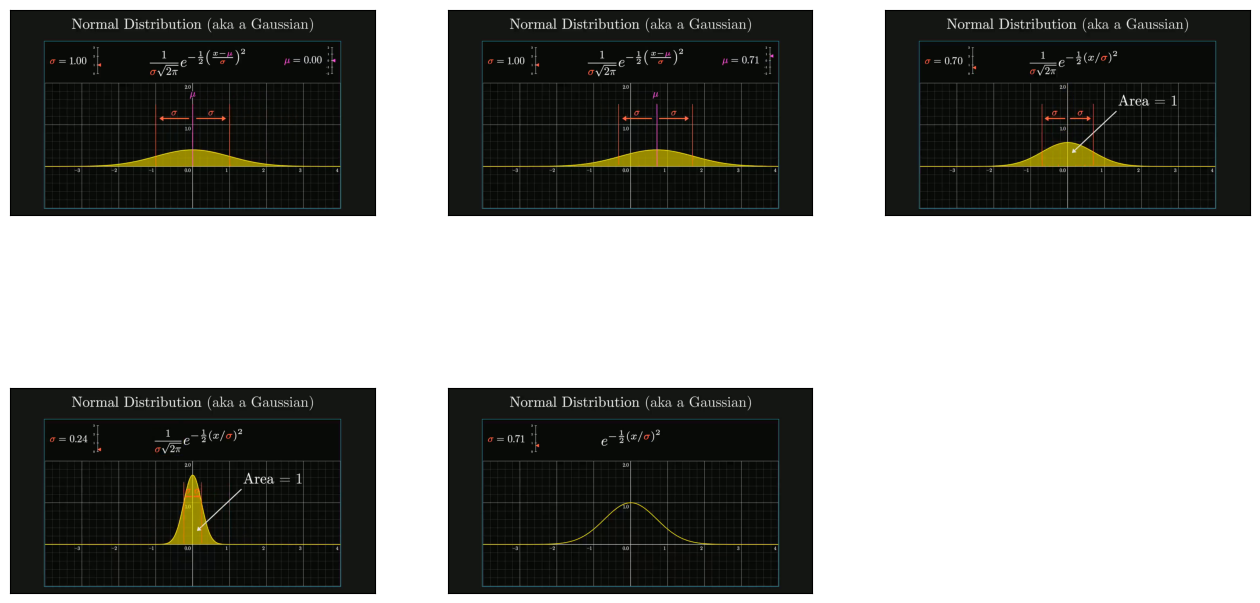

In [13]:
query_str = "Using examples from video, explain all things covered in the video regarding the gaussian function"

img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)
image_documents = SimpleDirectoryReader(
    input_dir=output_folder, input_files=img
).load_data()
context_str = "".join(txt)
plot_images(img)

In [14]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500
)

response_1 = openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str, query_str=query_str, metadata_str=metadata_str
    ),
    image_documents=image_documents,
)

pprint(response_1.text)

('The video by 3Blue1Brown titled "A pretty reason why Gaussian + Gaussian = '
 'Gaussian" covers several aspects of the Gaussian function, also known as the '
 'normal distribution. Here are the key points discussed in the video:\n'
 '\n'
 '1. **Central Limit Theorem**: The video begins by discussing the central '
 'limit theorem, which states that the sum of multiple independent random '
 'variables, each with finite mean and variance, tends to a normal '
 'distribution as the number of variables increases. This theorem is '
 'foundational in explaining why the Gaussian distribution is so prevalent in '
 'probability and statistics.\n'
 '\n'
 '2. **Convolution of Random Variables**: The concept of convolution is '
 'introduced as a mathematical operation used to find the distribution of the '
 'sum of two random variables. The video explains that when you add two '
 'normally distributed random variables, you are essentially computing the '
 'convolution of two Gaussian functions.\n'